In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

# Exact Experiments

In [2]:
environments = [
    "Deterministic (0.05)",
    "Deterministic (0.1)",
    "Deterministic (0.2)",
]

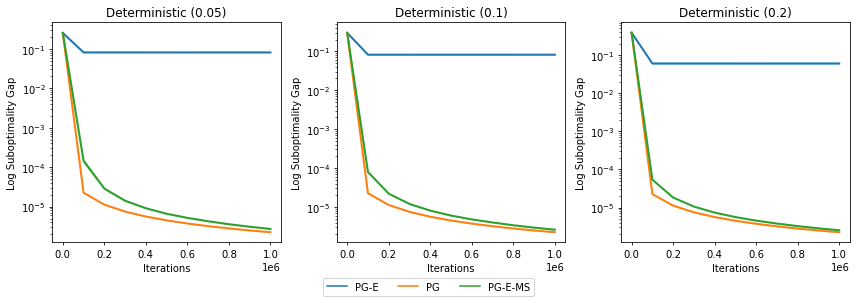

In [4]:
log_dir = "logs"
experiment_name = f"uni_init"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/pg_entropy_uniform.png", bbox_inches="tight", dpi=400)

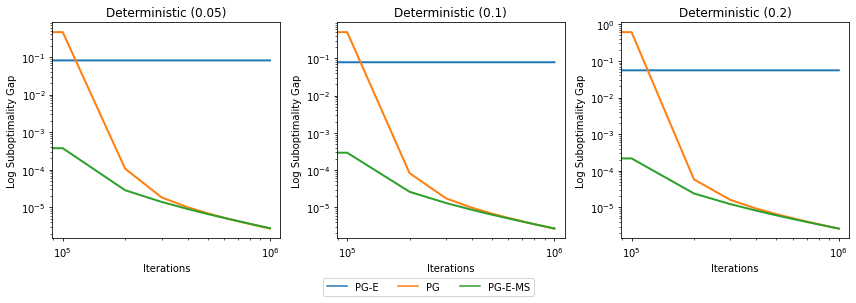

In [17]:
log_dir = "tests"
experiment_name = f"bad_init"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_xscale('log')
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/pg_entropy_bad.png", bbox_inches="tight", dpi=400)

# Stochastic Experiments

## Uniform Initilization

In [6]:
environments = [
    "Fixed",
    "Fixed"
    # "Bernoulli (easy)",
    # "Gaussian (easy)",
    # "Beta (easy)",
    # "Bernoulli (hard)",
    # "Gaussian (hard)",
    # "Beta (hard)",
]
log_dir = "logs"
experiment_name = f"constant_eta_snpg_debug"
path = f"{log_dir}/{experiment_name}"

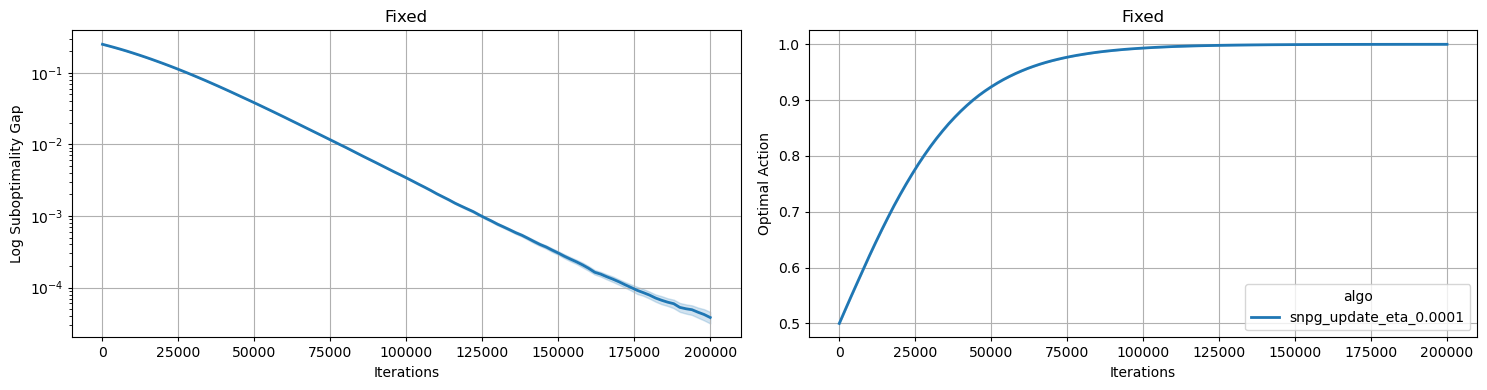

In [10]:
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]

    if idx == 0:
        line_plot = sns.lineplot(
            data=df_baseline, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
        )
        # remove legend in subplots
        line_plot.get_legend().remove()
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Log Suboptimality Gap")
        ax.set_yscale("log")
    else:
        prob = sns.lineplot(
            data=df_baseline, x="iteration", y="opt_action_pr", hue="algo", ax=ax, linewidth=2.0
        )
        # prob = sns.lineplot(
        #     data=df_baseline, x="iteration", y="opt_action_pr", hue="instance_number", ax=ax, linewidth=2.0
        # )
        # remove legend in subplots
        # prob.get_legend().remove()
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Optimal Action")
    ax.set_title(env)
    ax.grid(True)

    # n_lines = len(ax.lines) // 2
    # for i in range(n_lines, 2 * n_lines):
    #     if "entropy" in ax.lines[i].get_label():
    #         ax.lines[i].set_linestyle("--")
    #         ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
# lines, labels = fig.axes[0].get_legend_handles_labels()

# renamer = {
#     "spg_ess": "SPG-ESS",
#     "spg_gradient_step_size": "SPG-O-G",
#     "spg_delta_step_size": "SPG-O-R",
#     "spg_ess_eta_0_1_18": "SPG-ESS",
#     "spg_entropy_multistage": "SPG-E-MS",
#     "spg_multistage_ess": "SPG-ESS [D]",
#     "spg_entropy_ess": "SPG-E-ESS",
# }

# labels = [renamer.get(label, label) for label in labels]

# fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
# plt.tight_layout()
# plt.savefig("plots/snpg_eta_0.0001.png", bbox_inches="tight", dpi=400)

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3
pd.options.mode.chained_assignment = None

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

In [3]:
# define envs.
environments = [
    "Deterministic (0.05)",
    "Deterministic (0.1)",
    "Deterministic (0.2)",
]
# environments = [
#     "Bernoulli (easy)",
#     "Gaussian (easy)",
#     "Beta (easy)",
#     "Bernoulli (hard)",
#     "Gaussian (hard)",
#     "Beta (hard)",
# ]

In [1]:
def plot_sub_opt_gap_prob_opt_action_gs():
    env=environments[env_idx]
    experiment_name = "constant_eta_fine_gs_arms_{}_init_{}".format(num_arms, init)
    path = f"{log_dir}/{experiment_name}"

    # read the data from the logs.
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]

    # find the eta_list.
    df_baseline.index = df_baseline["algo"]
    algo_names = df_baseline["algo"].unique()
    eta_list = np.unique([float(e.split("_")[-1]) for e in algo_names])

    # plot the suboptimality gap and probability of optimal action.
    fig, ax = plt.subplots(nrows=2, ncols=len(eta_list) , figsize=(40, 10))

    for i, eta in enumerate(eta_list):
        # take mdpo and smdpo data with eta
        data = df_baseline[df_baseline["algo"].str.contains(f"eta_{eta}")]
        data["sub_opt_gap"].fillna(0, inplace=True)
        data["opt_action_pr"].fillna(0, inplace=True)

        # plot the suboptimality gap with blue color.
        line_plot = sns.lineplot(
            data=data, x="iteration", y="sub_opt_gap", hue="algo", ax=ax[0, i], linewidth=2.0
        )
        ax[0, i].set_title(f"eta = {eta}")
        ax[0, i].set_xlabel("Iterations")
        ax[0, i].set_ylabel("Log Suboptimality Gap")
        ax[0, i].set_yscale("log")
        ax[0, i].grid(True)

        # plot the probability of optimal action.
        prob = sns.lineplot(
            data=data, x="iteration", y="opt_action_pr", hue="algo", ax=ax[1, i], linewidth=2.0
        )
        ax[1, i].set_title(f"eta = {eta}")
        ax[1, i].set_xlabel("Iterations")
        ax[1, i].set_ylabel("Optimal Action")
        ax[1, i].grid(True)

    # save the plot.
    plt.tight_layout()
    plot_dir = 'plots/{}/{}'.format(experiment_name, env)
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    output_path = os.path.join(plot_dir, "mdpo_vs_smdpo_eta_grid_search.png")
    plt.savefig(output_path, bbox_inches="tight", dpi=400)

# exp setup
env_indices = range(len(environments))
num_arms_list = [2, 5, 10]
init_list = ['uniform', 'bad']
log_dir = "logs"
for env_idx in env_indices:
    for num_arms in num_arms_list:
        for init in init_list:
            plot_sub_opt_gap_prob_opt_action_gs()
            print(f"Done: {environments[env_idx]}, {num_arms}, {init}")


## Delta Dependent Eta

Done: Deterministic (0.05), 2, uniform
Done: Deterministic (0.05), 2, bad
Done: Deterministic (0.05), 5, uniform
Done: Deterministic (0.05), 5, bad
Done: Deterministic (0.05), 10, uniform
Done: Deterministic (0.05), 10, bad
Done: Deterministic (0.1), 2, uniform
Done: Deterministic (0.1), 2, bad
Done: Deterministic (0.1), 5, uniform
Done: Deterministic (0.1), 5, bad
Done: Deterministic (0.1), 10, uniform
Done: Deterministic (0.1), 10, bad
Done: Deterministic (0.2), 2, uniform
Done: Deterministic (0.2), 2, bad
Done: Deterministic (0.2), 5, uniform
Done: Deterministic (0.2), 5, bad
Done: Deterministic (0.2), 10, uniform
Done: Deterministic (0.2), 10, bad


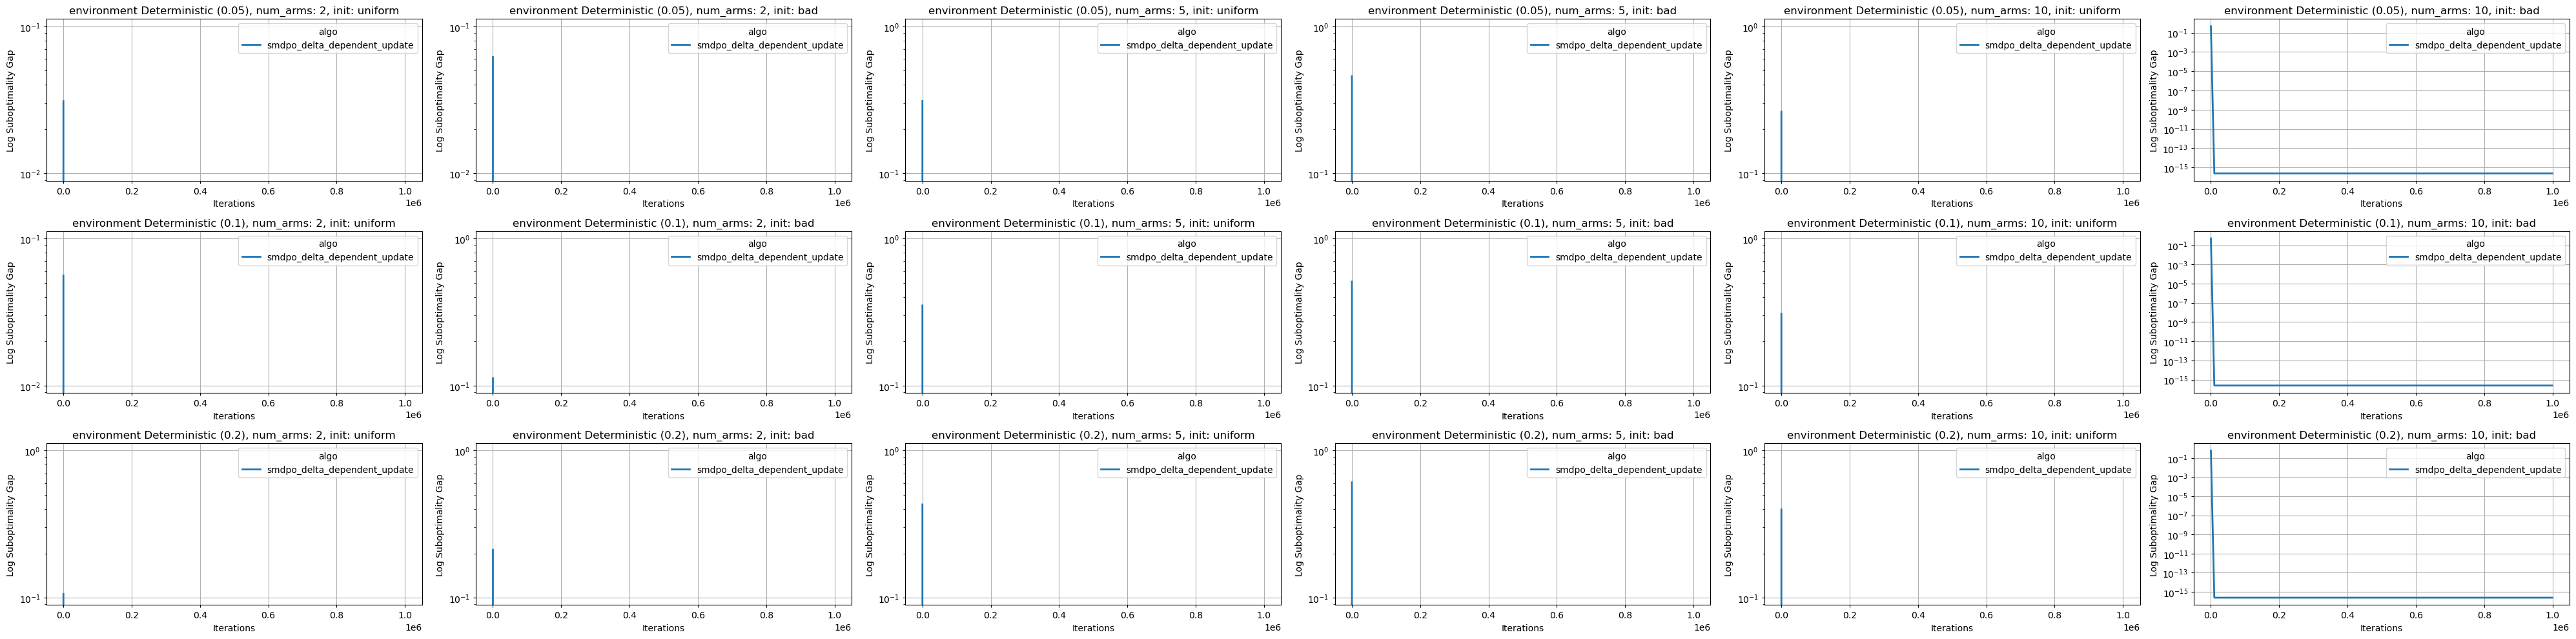

In [29]:
def plot_sub_opt_gap_prob_opt_action_delta_dep(metric, row_idx, col_idx):
    env=environments[env_idx]
    path = f"{log_dir}/{experiment_name}"

    # read the data from the logs.
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]

    # take mdpo and smdpo data with eta
    data = df_baseline
    data[metric].fillna(0, inplace=True)

    # plot the suboptimality gap with blue color.
    line_plot = sns.lineplot(
        data=data, x="iteration", y=metric, hue="algo", ax=axes[row_idx, col_idx], linewidth=2.0
    )
    title = "environment {}, num_arms: {}, init: {}".format(environments[env_idx], num_arms, init)
    axes[row_idx, col_idx].set_title(title)
    axes[row_idx, col_idx].set_xlabel("Iterations")
    if metric == 'sub_opt_gap':
        axes[row_idx, col_idx].set_ylabel("Log {}".format(metric_map[metric]))
        axes[row_idx, col_idx].set_yscale("log")
    else:
        axes[row_idx, col_idx].set_ylabel("{}".format(metric_map[metric]))
    axes[row_idx, col_idx].grid(True)

# exp setup
metric = 'sub_opt_gap'
env_indices = range(len(environments))
num_arms_list = [2, 5, 10]
init_list = ['uniform', 'bad']
log_dir = "logs"
plot_root_dir = 'delta_dependent_eta'
experiment_name_template = "delta_dependent_eta_arms_{}_init_{}"
metric_map = {'sub_opt_gap': 'Suboptimality Gap', 'opt_action_pr': 'Optimal Action'}

fig, axes = plt.subplots(nrows=len(environments), ncols=len(num_arms_list)*len(init_list), figsize=(40, 10))
for row_idx, env_idx in enumerate(env_indices):
    col_idx = 0
    for num_arms in num_arms_list:
        for init in init_list:
            experiment_name = experiment_name_template.format(num_arms, init)
            plot_sub_opt_gap_prob_opt_action_delta_dep(metric, row_idx, col_idx)
            print(f"Done: {environments[env_idx]}, {num_arms}, {init}")
            col_idx += 1

plt.tight_layout()
plot_dir = 'plots/{}'.format(plot_root_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output_path = os.path.join(plot_dir, "smdpo_delta_dependent_eta_{}.png".format(metric))
plt.savefig(output_path, bbox_inches="tight", dpi=400)
